In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [2]:
train_data = pd.read_csv('House_price/train.csv')
test_data = pd.read_csv('House_price/test.csv')

In [3]:
X = train_data.drop('price', axis=1)  # Assuming 'price' is the target variable
y = train_data['price']

In [4]:
X

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code
0,3,2.5,2590.0,sqft,6000.00,sqft,98144
1,4,2.0,2240.0,sqft,0.31,acre,98106
2,4,3.0,2040.0,sqft,3783.00,sqft,98107
3,4,3.0,3800.0,sqft,5175.00,sqft,98199
4,2,2.0,1042.0,sqft,NaN,NaN,98102
...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112
2012,1,1.0,889.0,sqft,NaN,NaN,98121
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199
2014,2,2.0,795.0,sqft,NaN,NaN,98103


In [5]:
y

0        795000.0
1        915000.0
2        950000.0
3       1950000.0
4        950000.0
          ...    
2011     910000.0
2012     550000.0
2013    1150000.0
2014     590000.0
2015     659000.0
Name: price, Length: 2016, dtype: float64

In [6]:
X = pd.get_dummies(X, drop_first=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [9]:
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 138951992649.77225


In [13]:
test_data_with_id = test_data.copy()
test_data_with_id['price'] = 0

In [14]:
test_data_without_target = test_data_with_id.drop('price', axis=1)

In [15]:
test_data_without_target = pd.get_dummies(test_data_without_target, drop_first=True)

In [16]:
test_data_without_target = pd.DataFrame(imputer.transform(test_data_without_target), columns=test_data_without_target.columns)

In [17]:
test_predictions = model.predict(test_data_without_target)

In [18]:
submission_df = pd.DataFrame({'Id': range(1, len(test_predictions) + 1), 'price': test_predictions})
submission_df.to_csv('House_price/predictions.csv', index=False)

In [19]:
submission_df

,Id,price
0,1,1.622162e+06
1,2,1.718844e+06
2,3,6.925011e+05
3,4,1.000214e+06
4,5,1.206236e+06
...,...,...
500,501,2.695712e+06
501,502,8.172714e+05
502,503,1.544916e+06
503,504,1.558018e+06


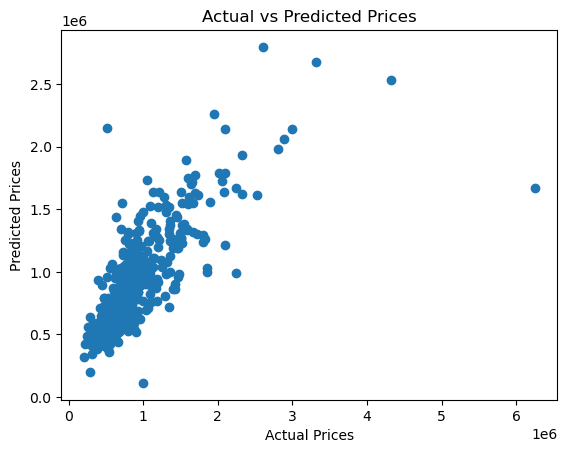

In [20]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()